In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [2]:
#%%bash
#awk '{gsub(/chrM/, "M"); gsub(/chrXVI/, "16"); gsub(/chrXV/, "15"); gsub(/chrXIV/, "14"); gsub(/chrXIII/, "13"); gsub(/chrXII/, "12"); gsub(/chrXI/, "11"); gsub(/chrX/, "10"); gsub(/chrIX/, "9"); gsub(/chrVIII/, "8");gsub(/chrVII/, "7"); gsub(/chrVI/, "6"); gsub(/chrV/, "5"); gsub(/chrIV/, "4"); gsub(/chrIII/, "3"); gsub(/chrII/, "2"); gsub(/chrI/, "1"); print;}' BYxRM_segs_saccer3.bam.simplified.vcf > _new_num_chr.vcf

In [3]:
%%bash
plink --vcf ~/qbb2020-answers/quantbio/week3/_new_num_chr.vcf --pca --mind

 #plink comlains bc dta has missing values for sex column so tell plink it is a ok

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/quantbio/week3/_new_num_chr.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%3

In [7]:
pca = pd.read_csv('~/qbb2020-answers/quantbio/week3/plink.eigenvec', sep=' ', header = None)
pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.029378,0.018745,0.022175,0.044528,-0.001789,-0.050865,0.021753,0.029626,...,0.026522,0.016841,-0.006246,-0.006940,-0.018867,0.005404,-0.015076,0.033143,-0.024146,-0.031972
1,A01,2,-0.017887,-0.015345,-0.009631,-0.068047,0.059240,-0.039711,-0.029401,-0.072011,...,0.016000,0.032868,0.006906,0.002385,-0.005891,0.027033,0.018026,-0.024712,-0.012689,0.007008
2,A01,3,-0.013429,-0.014787,-0.054910,-0.038837,0.041852,-0.021421,-0.025730,0.045609,...,-0.043116,0.036535,0.006282,0.008186,-0.013674,-0.047069,0.026872,0.011978,0.018804,-0.005523
3,A01,4,0.023954,-0.069207,0.000777,0.009675,-0.022796,-0.031488,0.027907,-0.021277,...,-0.012396,-0.046710,-0.003235,-0.005111,-0.020471,-0.030723,0.015964,0.057114,-0.028091,0.053180
4,A01,5,-0.036794,0.070514,0.023257,-0.010419,-0.017322,-0.006097,-0.017309,0.006571,...,0.039460,-0.014528,0.002385,-0.015274,0.016490,0.032988,0.012756,0.025461,-0.015445,-0.031543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.026606,0.032423,0.071461,0.010042,0.034463,-0.001477,-0.002375,-0.015118,...,0.003805,0.034901,-0.033627,-0.008241,-0.002863,-0.032656,-0.028643,0.018956,-0.002176,0.023879
947,A11,93,-0.008119,-0.010684,-0.050010,-0.035384,0.048263,0.002550,-0.051717,-0.040367,...,-0.001955,-0.000349,-0.009283,-0.016167,0.001374,-0.039100,-0.017596,0.023039,-0.000226,0.025441
948,A11,94,-0.001145,0.060205,0.001088,-0.005471,0.000833,0.053251,-0.008853,0.019402,...,-0.053303,0.025990,0.066653,0.049832,-0.034562,-0.073626,-0.029021,-0.043632,-0.019187,0.065169
949,A11,95,-0.002577,0.051168,0.009742,-0.007548,-0.028898,0.052776,-0.010332,0.005138,...,-0.027829,0.045514,0.000397,-0.026079,-0.015475,-0.028324,-0.001001,0.015677,-0.021918,-0.004906


In [31]:
%%bash
head -n 30 _new_num_chr.vcf

##fileformat=VCFv4.2
##fileDate=20170921
##source=freeBayes v1.1.0-dirty
##reference=genome/sacCer3.fa
##contig=<ID=1,length=230218>
##contig=<ID=2,length=813184>
##contig=<ID=3,length=316620>
##contig=<ID=4,length=1531933>
##contig=<ID=9,length=439888>
##contig=<ID=5,length=576874>
##contig=<ID=6,length=270161>
##contig=<ID=7,length=1090940>
##contig=<ID=8,length=562643>
##contig=<ID=10,length=745751>
##contig=<ID=11,length=666816>
##contig=<ID=12,length=1078177>
##contig=<ID=13,length=924431>
##contig=<ID=14,length=784333>
##contig=<ID=15,length=1091291>
##contig=<ID=16,length=948066>
##contig=<ID=M,length=85779>
##phasing=none
##commandline="freebayes -f genome/sacCer3.fa BYxRM_segs_saccer3.bam --use-best-n-alleles 4 --min-alternate-count 20 --region 1:0-10000"
##filter="QUAL > 50000"
##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1]">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=DP,Number=1,Type=Integer,Descrip

In [ ]:
# Question 2: Histogram of Allele Frequencies

In [34]:
file = open('/Users/cmdb/qbb2020-answers/quantbio/week3/_new_num_chr.vcf', 'r')
AF_list = []
count = 0
for line in file:
    if line.startswith('#'):
        continue
    fields = line.strip('\r\n').split('\t')
    AF_temp = fields[7]
    AF_temp2= AF_temp[3:].split(',')
    for val in AF_temp2:
        AF_list.append(float(val))
print(AF_list[0:15])
vcf.close()

[0.690206, 0.710472, 0.565776, 0.503932, 0.712679, 0.713408, 0.695903, 0.493498, 0.496109, 0.5215, 0.529564, 0.524582, 0.518839, 0.522523, 0.519038]


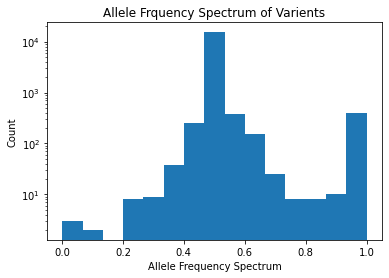

In [37]:
fig, ax = plt.subplots()
ax.hist(AF_list, bins = 15)
ax.set_title('Allele Frquency Spectrum of Varients')
ax.set_xlabel('Allele Frequency Spectrum')
ax.set_yscale('log')
ax.set_ylabel('Count')
plt.show()

In [ ]:
#this just got rid of all the underscores in the file, which i need to fix because it causes problems later on
#%%bash
#awk '{gsub("_","\t"); print}' BYxRM_PhenoData.txt > new_pheno.txt

In [ ]:
%%bash
plink --vcf ~/qbb2020-answers/quantbio/week3/_new_num_chr.vcf --pheno ~/qbb2020-answers/quantbio/week3/new_pheno.txt --linear --allow-no-sex --covar plink.eigenvec --covar-number 1-10 --all-pheno 

In [ ]:
gwas = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")

gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))
gwas

In [ ]:
import matplotlib.pyplot as plt

gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

for chr in range(1, 23): 
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
    
plt.show()

In [ ]:
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted

In [ ]:
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
gwas_sorted

In [ ]:
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots(nrows=46, ncols=2)

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

In [ ]:
pheno = ["Cadmium", "Caffeine", "Calcium", "Cisplatin", "Cobalt", "Congo", "Copper", "Cycloheximide", "Diamide", "E6", "Ethanol", "Formamide", "Galactose", "Hydrogen", "Hydroquinone", "Hydroxyurea", "Indoleacetic", "Lactate", "Lactose", "Lithium", "Magnesium", "Maltose", "Mannose", "Menadione","Neomycin", "Paraquat", "Raffinose", "SDS", "Sorbitol", "Trehalose", "Tunicamycin", "x4-Hydroxybenzaldehyde", "x4NQO", "x5-Fluorocytosine", ",x5-Fluorouracil", "x6-Azauracil", "Xylose", "YNB", "YNB:ph3", "YNB:ph8", "YPD", "YPD:15C", "YPD:37C", "YPD:4C", "Zeocin"]
pheno

In [ ]:
#in for loop need to make pandas data frame, make manhattan plot, make QQ plot for each phenotype

fig, ax = plt.subplots(nrows=46, ncols=2)
for phenotype in range(0, len(pheno)):
    #make data frame
    gwas = pd.read_csv("plink." + pheno[phenotype] + ".assoc.linear", sep = "\s+")

    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    
    ax[0][1].gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')
    gwas['snp_index'] = range(len(gwas))


    
    #Manhattan plot
    for chr in range(1, 23): 
        ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')

        plt.xlabel("SNPs")
        plt.ylabel("-log10(p-value)")
        
    gwas['snp_index'] = range(len(gwas))
    
    #QQ plot
  

    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    
    
 
    